In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [3]:
!pip install --upgrade datasets


In [4]:
from datasets import load_dataset
emotion = load_dataset('emotion')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
type(emotion)

datasets.dataset_dict.DatasetDict

In [7]:
# we see it is similar to a Python dictionary, with each key corresponding to a different
# split. And we can use the usual dictionary syntax to access an individual split:
train_ds = emotion["train"] # accessing dataset's key
train_ds
# this returns the instance of the dataset class. The dataset object is very important data structure in hugging face.

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
print(type(train_ds))
print(len(train_ds))

<class 'datasets.arrow_dataset.Dataset'>
16000


In [9]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [10]:

train_ds.column_names

['text', 'label']

In [11]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [12]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [13]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [14]:
emotion.set_format(type = 'pandas')


In [15]:
# underlying data structure has not changed. Though, now we can work with pandas like table.
type(emotion['train'])

datasets.arrow_dataset.Dataset

In [16]:
print(type(emotion['train'][:5]))
print(emotion['train'][:5])

<class 'pandas.core.frame.DataFrame'>
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [17]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [18]:
# Now, we also need a label (emotion type) for our texts.
classes = emotion['train'].features['label'].names

In [19]:
df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**DATASET ANALYSIS BEGINS**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [22]:
df['label_name'].value_counts(ascending = True)

label_name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

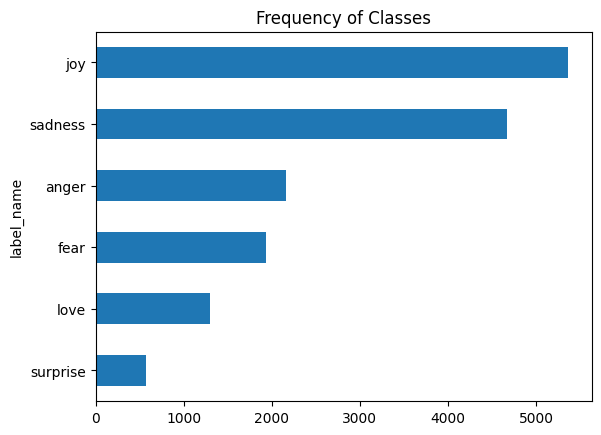

In [23]:
df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [24]:
# No need to worry about the imbalance dataset cuz transformer works well with imbalance datasets

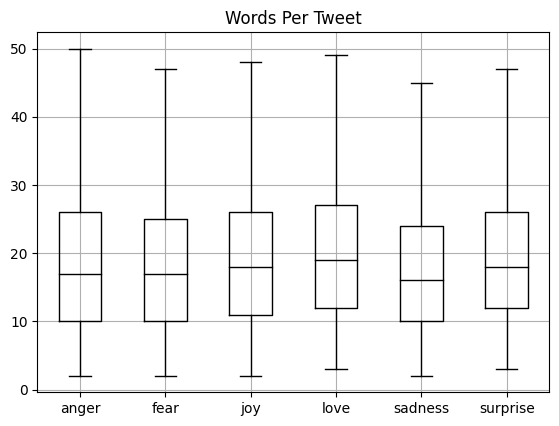

In [25]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet",
           by = "label_name",
           grid = True,
           showfliers = False,
           color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

